# Kaggle TGS Salt Identification Challenge Ensemble Outputs

Ensemble the outputs of multiple submission files

## Setup

In [1]:
import os
import sys

from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread, imsave
from skimage.color import gray2rgb
from skimage.color import rgb2gray

Setup some global settings and configuration

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
data_folder = os.path.join(project_root, 'data')
data_folder_raw = os.path.join(data_folder, 'raw')
data_folder_submissions = os.path.join(data_folder, 'submissions')
src_folder = os.path.join(project_root, 'src')

This notebook uses the shared package however first we need to ensure it is available (otherwise you get an error about the module not being found). You can either run setup.py as discussed in the readme to install the package or modify the path to include the src folder.

In [3]:
# Explicitly set path so don't need to run setup.py - if we have multiple copies of 
# the code we would otherwise need to setup a seperate environment for each to
# ensure the code pointers are correct.
sys.path.insert(0, src_folder)

from tgssalt_challenge.submission import rle_decode, ensemble_rle_submissions

## Ensemble the data

In [4]:
submission_files = [os.path.join(data_folder_submissions, x) for x in 
                    ['Unet_resnet_v5 (1).csv', 
                     'Unet_resnet_v5.csv', 
                     'unet_crf (0.774).csv']]
ensemble_threshold = 2

In [5]:
ensemble, all_data = ensemble_rle_submissions(submission_files, ensemble_threshold)

In [6]:
ensemble.head(10)

,id,rle_mask
0,353e010b7b,NaN
1,5439dbbddf,NaN
2,71bab9f311,NaN
3,52551f7a80,NaN
4,512d8d9997,1 34 94 42 195 42 295 43 396 43 496 45 596 46 ...
5,64dba827d6,NaN
6,0a3a8a5f37,NaN
7,329563756f,1 9077 9084 89 9190 1 9192 78 9293 74 9394 71 ...
8,f6cba2e890,NaN
9,989c646373,368 1 467 1 469 5 475 1 477 1 570 5 576 1 580 ...


In [7]:
all_data.head(10)

,id,rle_mask_0,rle_mask_1,rle_mask_2
0,353e010b7b,NaN,NaN,NaN
1,5439dbbddf,NaN,NaN,NaN
2,71bab9f311,NaN,NaN,NaN
3,52551f7a80,NaN,NaN,NaN
4,512d8d9997,1 4 102 5 203 5 304 6 405 7 506 7 607 8 708 8 ...,1 33 102 33 203 32 304 32 405 32 506 32 607 32...,1 23 102 25 203 25 304 25 405 25 506 25 607 24...
5,64dba827d6,NaN,NaN,NaN
6,0a3a8a5f37,NaN,NaN,NaN
7,329563756f,1 5150 5152 100 5253 98 5354 98 5455 98 5556 9...,1 5453 5455 99 5556 98 5657 98 5758 97 5859 97...,1 5352 5354 99 5455 98 5556 98 5657 97 5758 97...
8,f6cba2e890,NaN,NaN,NaN
9,989c646373,368 1 467 1 469 5 475 1 477 1 570 5 576 1 580 ...,NaN,NaN


In [8]:
ensemble.to_csv(os.path.join(data_folder_submissions,'ensemble.csv'),index=False)

## Visualise sample output

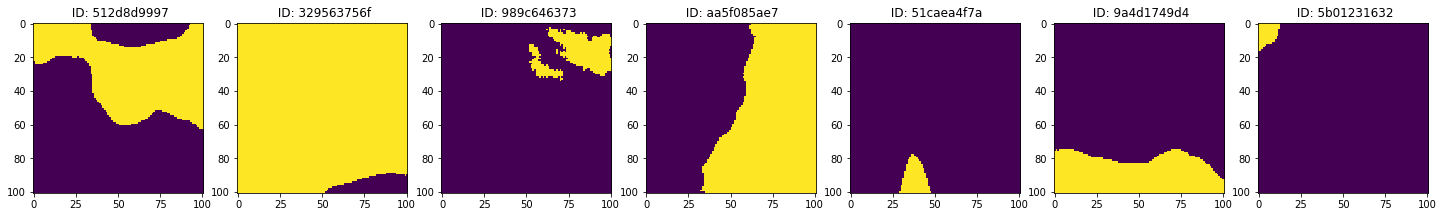

In [9]:
i = 0
plt.figure(figsize=(25,12))
plt.subplots_adjust(bottom=0.3, top=0.9, hspace=0.3) 
j = 0
while True:
    if str(ensemble.loc[i,'rle_mask'])!=str(np.nan):        
        decoded_mask = rle_decode(ensemble.loc[i,'rle_mask'])
        plt.subplot(1,7,j+1)
        plt.imshow(decoded_mask)
        plt.title(' ID: '+ ensemble.loc[i,'id'])
        j = j + 1
        if j > 6:
            break
    i = i + 1